# Feldspar-liquid thermobarometry
- Unlike for Cpx and Opx, because the components are calculated the same for Plag and Kspar, we have a single function, calculate_liq_fspar_temp and calculate_liq_fspar_press.
- If the mineral is plagioclase, the functions should use plag_comps=dataframe, while if its Kspar, kspar_comps=dataframe

You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

## first, load python things

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## Loading plagioclase- liquid pairs

In [3]:
out_PL=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Plag_Liquid")
# This extracts a dataframe of all inputs
my_input_PL=out_PL['my_input']
# This extracts a dataframe of plag compositions from the dictionary "out"
Plags=out_PL['Plags']
Liqs_PL=out_PL['Liqs']

## Lets check these inputs look good (e.g. not just a load of zeros)

In [4]:
display(Plags.head())
display(Liqs_PL.head())

,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,0
1,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,1
2,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,2
3,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,3
4,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,4


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0
1,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1
2,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2
3,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3
4,48.1,3.88,13.2,16.4,0.16,4.02,6.51,3.36,1.36,0.0,1.59,0.0,0.0,0.0,0.0,0.0,4


## Loading Kspar-liquid pairs

In [5]:
out_KL=pt.import_excel('Feldspar_Liquid.xlsx', sheet_name="Kspar_Liquid")
my_input_KL=out_KL['my_input']
Kspars=out_KL['Kspars']
Liqs_KL=out_KL['Liqs']
# As before, we inspect the outputs
display(Kspars.head())
display(Liqs_KL.head())

,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar
0,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0.0
1,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0.0
2,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0.0
3,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0.0
4,65.1,0.0,19.2,0.05,0.0,0.00,0.36,2.87,12.60,0.0


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,61.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,7.09,0.0,0.02,2,0.0,0.0,0.0,0.0,0
1,61.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,7.09,0.0,0.02,3,0.0,0.0,0.0,0.0,1
2,62.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,6.09,0.0,0.02,5,0.0,0.0,0.0,0.0,2
3,62.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,6.09,0.0,0.02,5,0.0,0.0,0.0,0.0,3
4,62.71,0.45,18.56,3.17,0.27,0.23,1.64,6.11,6.09,0.0,0.02,5,0.0,0.0,0.0,0.0,4


## Example 1 - Plagioclase-Liquid thermomometry
- to get more information, can always do help(pt.function)

In [6]:
help(pt.calculate_fspar_liq_temp)

Help on function calculate_fspar_liq_temp in module Thermobar.feldspar:

calculate_fspar_liq_temp(*, plag_comps=None, kspar_comps=None, liq_comps=None, equationT=None, P=None, H2O_Liq=None, eq_tests=False)
    Liquid-Feldspar thermometery (same function for Plag and Kspar),
    returns temperature in Kelvin.
    
    Parameters
    -------
    
    liq_comps: pandas.DataFrame
        liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
    kspar_comps or plag_comps (pandas.DataFrame)
    
        Specify kspar_comps=... for Kspar-Liquid thermometry (with column headings SiO2_Kspar, MgO_Kspar) etc
    
        Specify plag_comps=... for Plag-Liquid thermometry (with column headings SiO2_Plag, MgO_Plag) etc
    
    EquationT: str
    
        choose from:
    
            |   T_Put2008_eq24b (Kspar-Liq, P-dependent, H2O-independent
            |   T_Put2008_eq23 (Plag-Liq, P-dependent, H2O-dependent)
            |   T_Put2008_eq24a (Plag-Liq, P-dependent, H2O-dependent)


### Temperature using equation 23 at 5 kbar

In [7]:
T_PL_eq23_5kbar=pt.calculate_fspar_liq_temp(plag_comps=Plags, liq_comps=Liqs_PL, 
                                            equationT="T_Put2008_eq23", P=5)
T_PL_eq23_5kbar.head()

0    1408.019018
1    1423.834489
2    1420.063528
3    1386.731667
4    1392.393338
dtype: float64

### Temperature using equation 24a at 5 kbar

In [8]:
T_PL_eq24a_5kbar=pt.calculate_fspar_liq_temp(plag_comps=Plags, liq_comps=Liqs_PL, 
                                            equationT="T_Put2008_eq24a", P=5)
T_PL_eq24a_5kbar.head()

0    1403.230284
1    1420.491341
2    1415.791914
3    1389.139656
4    1400.312158
dtype: float64

### Equilibrium tests
- We can also calculate equilibrium tests following the methods described in the supporting information of Putirka (2008) (Fspar-Liq spreadsheet)
- By default, no filtering is done, but specifiying eq_tests=True calculates the relevant equilibrium parameters, and then below we show how to filter outputs with different values of these

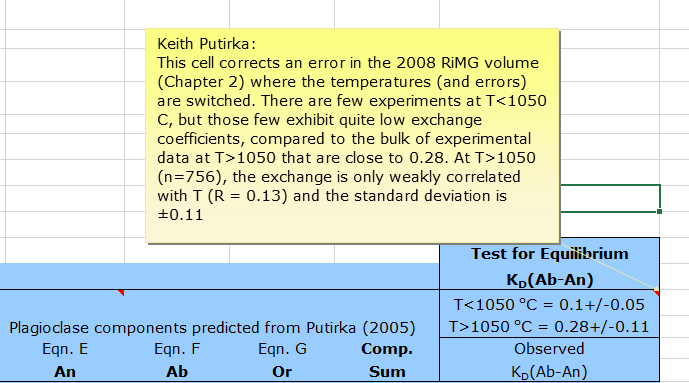


In [9]:
T_PL_eq23_5kbar_EqTests=pt.calculate_fspar_liq_temp(plag_comps=Plags, liq_comps=Liqs_PL, 
                        equationT="T_Put2008_eq23", P=5, eq_tests=True)
T_PL_eq23_5kbar_EqTests.head()

,T_K_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
0,1408.019018,High T: No,0.101016,0.152353,0.029108,0.518145,0.401303,0.000107,0.510102,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,0,0.953660,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0,0.549988,0.053436,0.001328,0.138640,0.080652,0.095052,0.036269,0.012146,0.027130,0.005358,0.0,0.478739,0.046513,0.001156,0.120680,0.070204,0.165477,0.063141,0.021146,0.023616,0.009328,0.0,0.278194,0.278194,5,1408.019018
1,1423.834489,High T: No,0.089866,0.102459,0.027941,0.542990,0.416085,0.000391,0.455475,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1,0.545500,0.064131,0.001127,0.127030,0.080306,0.099965,0.036975,0.008628,0.032442,0.003896,0.0,0.474569,0.055792,0.000980,0.110512,0.069864,0.173933,0.064334,0.015012,0.028224,0.006778,0.0,0.335475,0.335475,5,1423.834489
2,1420.063528,High T: No,0.117189,0.110312,0.022764,0.535451,0.447991,0.000671,0.500004,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,2,0.958653,0.001737,0.006959,0.151576,0.515884,0.202327,0.008493,0.0,0.001377,0.0,1.847006,0.519031,0.000940,0.003768,0.082066,0.279308,0.109543,0.004598,0.0,0.000746,0.0,0.418261,0.558303,0.023435,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2,0.547269,0.070071,0.001308,0.119955,0.077907,0.102731,0.039042,0.007319,0.031455,0.002943,0.0,0.475045,0.060823,0.001136,0.104124,0.067626,0.178348,0.067779,0.012707,0.027304,0.005108,0.0,0.368736,0.368736,5,1420.063528
3,1386.731667,High T: No,0.021553,0.029279,0.049656,0.470193,0.472391,0.000034,0.461028,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,3,0.951996,0.001489,0.008630,0.161027,0.529614,0.180061,0.017835,0.0,0.002003,0.0,1.852655,0.513855,0.000804,0.004658,0.086917,0.285868,0.097191,0.009627,0.0,0.001081,0.0,0.448640,0.501670,0.049691,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,5,1386.731667
4,1392.393338,High T: Yes,0.021115,0.029107,0.028064,0.448856,0.530743,0.000329,0.369633,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,4,0.943674,0.002729,0.009604,0.168695,0.541383,0.180061,0.010192,0.0,0.001753,0.0,1.858092,0.507873,0.001469,0.005169,0.090790,0.291365,0.096907,0.005485,0.0,0.000943,0.0,0.469971,0

### Here we filter based on whether any given pair passes the An-Ab test within the values recomended by Putirka (2008) (T>1050 is 0.28+-0.11, and T<1050 is 0.1+-0.05)
- The code uses the calculated temperature to decide what value to compare against, and the print Yes or No, as well as the temperature category it placed it into
- Then, we make a variable of true/false called Eq_Filt, where we want it to read True if any of the column 'Pass An-Ab Eq Test Put2008?' contains the word yes
- By using Loc, we extract the rows of the dataframe T_PL_eq23_5kbar_EqTests where Eq_Filt is True
- The new dataframe "T_PL_eq23_filt" contains only pairs passing this filter

In [10]:
Eq_filt=T_PL_eq23_5kbar_EqTests['Pass An-Ab Eq Test Put2008?'].str.contains("Yes")
T_PL_eq23_filt=T_PL_eq23_5kbar_EqTests.loc[Eq_filt]
T_PL_eq23_filt

,T_K_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
4,1392.393338,High T: Yes,0.021115,0.029107,0.028064,0.448856,0.530743,0.000329,0.369633,56.70,0.14,27.60,0.69,0.00,0.11,9.46,5.580,0.48,0.0,4,0.943674,0.002729,0.009604,0.168695,0.541383,0.180061,0.010192,0.000000,0.001753,0.0,1.858092,0.507873,0.001469,0.005169,0.090790,0.291365,0.096907,0.005485,0.000000,0.000943,0.0,0.469971,0.501636,0.028393,48.10,3.88,13.20,16.40,0.16,4.02,6.51,3.36,1.36,0.0,1.59,0.00,0.0,0.0,0.0,0.0,4,0.531999,0.066283,0.001499,0.151693,0.077147,0.086033,0.036027,0.009595,0.032280,0.007444,0.0,0.467035,0.058189,0.001316,0.133169,0.067727,0.151055,0.063254,0.016846,0.028338,0.013071,0.0,0.304076,0.304076,5,1392.393338
6,1410.107078,High T: Yes,0.007695,0.037224,0.021375,0.479576,0.527774,0.000804,0.331605,56.10,0.21,27.80,0.56,0.00,0.09,9.94,5.530,0.38,0.0,6,0.933688,0.002233,0.007794,0.177255,0.545307,0.178448,0.008068,0.000000,0.002629,0.0,1.855422,0.503221,0.001204,0.004201,0.095534,0.293899,0.096176,0.004348,0.000000,0.001417,0.0,0.487271,0.490550,0.022180,49.50,4.23,14.80,14.00,0.16,4.63,6.36,3.76,1.04,0.0,0.69,0.00,0.0,0.0,0.0,0.0,6,0.540606,0.075382,0.001480,0.127867,0.074423,0.095250,0.039809,0.007245,0.034749,0.003190,0.0,0.471941,0.065807,0.001292,0.111626,0.064970,0.166303,0.069505,0.012650,0.030336,0.005570,0.0,0.370875,0.370875,5,1410.107078
7,1418.246494,High T: Yes,0.026281,0.006622,0.020336,0.507864,0.503560,0.001144,0.366685,56.40,0.20,27.30,0.53,0.00,0.08,9.61,5.480,0.36,0.0,7,0.938681,0.001985,0.007377,0.171370,0.535499,0.176834,0.007644,0.000000,0.002504,0.0,1.841894,0.509628,0.001078,0.004005,0.093040,0.290733,0.096007,0.004150,0.000000,0.001359,0.0,0.481582,0.496938,0.021480,49.50,4.04,15.30,13.50,0.13,4.65,6.39,3.62,0.90,0.0,0.66,0.00,0.0,0.0,0.0,0.0,7,0.543380,0.076096,0.001209,0.123933,0.075158,0.098973,0.038523,0.006302,0.033359,0.003067,0.0,0.473796,0.066351,0.001054,0.108063,0.065533,0.172598,0.067180,0.010990,0.029087,0.005348,0.0,0.380415,0.380415,5,1418.246494
8,1388.282711,High T: Yes,0.044579,0.021938,0.029839,0.444467,0.502815,0.000237,0.368925,56.00,0.14,27.00,0.64,0.00,0.09,9.68,5.260,0.50,0.0,8,0.932024,0.002233,0.008908,0.172619,0.529614,0.169735,0.010616,0.000000,0.001753,0.0,1.827502,0.509999,0.001222,0.004874,0.094456,0.289802,0.092878,0.005809,0.000000,0.000959,0.0,0.489046,0.480877,0.030077,52.00,4.04,12.50,14.30,0.15,3.30,6.71,2.80,1.41,0.0,1.17,0.00,0.0,0.0,0.0,0.0,8,0.573262,0.054234,0.001401,0.131838,0.079258,0.081206,0.029924,0.009915,0.033501,0.005460,0.0,0.508885,0.048144,0.001243,0.117033,0.070358,0.144173,0.053128,0.017603,0.029739,0.009694,0.0,0.291461,0.291461,5,1388.282711
9,1397.830490,High T: Yes,0.107368,0.061476,0.020652,0.445034,0.488335,0.000087,0.197672,54.50,0.00,27.50,0.75,0.00,0.24,11.10,4.740,0.35,0.0,9,0.907059,0.005955,0.010439,0.197941,0.539422,0.152955,0.007431,0.000000,0.000000,0.0,1.821202,0.49

### Can also add filters based on Delta An, Ab, Or values
- Here, new dataframe "T_PL_eq23_filt2" has calculated and predicted An values within 0.05, 0.03 for Or and 0.03 for Ab

In [11]:

Eq_filt_An=T_PL_eq23_5kbar_EqTests['Delta_An']<0.05
Eq_filt_Or=T_PL_eq23_5kbar_EqTests['Delta_Or']<0.03
Eq_filt_Ab=T_PL_eq23_5kbar_EqTests['Delta_Ab']<0.03

T_PL_eq23_filt2=T_PL_eq23_5kbar_EqTests.loc[Eq_filt&Eq_filt_An&Eq_filt_Ab&Eq_filt_Or]
T_PL_eq23_filt2

,T_K_calc,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
4,1392.393338,High T: Yes,0.021115,0.029107,0.028064,0.448856,0.530743,0.000329,0.369633,56.70,0.14,27.60,0.69,0.00,0.11,9.46,5.58,0.48,0.0,4,0.943674,0.002729,0.009604,0.168695,0.541383,0.180061,0.010192,0.000000,0.001753,0.0,1.858092,0.507873,0.001469,0.005169,0.090790,0.291365,0.096907,0.005485,0.000000,0.000943,0.0,0.469971,0.501636,0.028393,48.10,3.88,13.20,16.40,0.16,4.02,6.51,3.36,1.36,0.0,1.59,0.00,0.0,0.0,0.0,0.0,4,0.531999,0.066283,0.001499,0.151693,0.077147,0.086033,0.036027,0.009595,0.032280,0.007444,0.0,0.467035,0.058189,0.001316,0.133169,0.067727,0.151055,0.063254,0.016846,0.028338,0.013071,0.0,0.304076,0.304076,5,1392.393338
7,1418.246494,High T: Yes,0.026281,0.006622,0.020336,0.507864,0.503560,0.001144,0.366685,56.40,0.20,27.30,0.53,0.00,0.08,9.61,5.48,0.36,0.0,7,0.938681,0.001985,0.007377,0.171370,0.535499,0.176834,0.007644,0.000000,0.002504,0.0,1.841894,0.509628,0.001078,0.004005,0.093040,0.290733,0.096007,0.004150,0.000000,0.001359,0.0,0.481582,0.496938,0.021480,49.50,4.04,15.30,13.50,0.13,4.65,6.39,3.62,0.90,0.0,0.66,0.00,0.0,0.0,0.0,0.0,7,0.543380,0.076096,0.001209,0.123933,0.075158,0.098973,0.038523,0.006302,0.033359,0.003067,0.0,0.473796,0.066351,0.001054,0.108063,0.065533,0.172598,0.067180,0.010990,0.029087,0.005348,0.0,0.380415,0.380415,5,1418.246494
8,1388.282711,High T: Yes,0.044579,0.021938,0.029839,0.444467,0.502815,0.000237,0.368925,56.00,0.14,27.00,0.64,0.00,0.09,9.68,5.26,0.50,0.0,8,0.932024,0.002233,0.008908,0.172619,0.529614,0.169735,0.010616,0.000000,0.001753,0.0,1.827502,0.509999,0.001222,0.004874,0.094456,0.289802,0.092878,0.005809,0.000000,0.000959,0.0,0.489046,0.480877,0.030077,52.00,4.04,12.50,14.30,0.15,3.30,6.71,2.80,1.41,0.0,1.17,0.00,0.0,0.0,0.0,0.0,8,0.573262,0.054234,0.001401,0.131838,0.079258,0.081206,0.029924,0.009915,0.033501,0.005460,0.0,0.508885,0.048144,0.001243,0.117033,0.070358,0.144173,0.053128,0.017603,0.029739,0.009694,0.0,0.291461,0.291461,5,1388.282711
19,1514.271339,High T: Yes,0.042248,0.013302,0.005014,0.804288,0.219359,0.000286,0.296268,48.73,0.06,31.46,0.35,0.00,0.22,15.41,2.60,0.09,0.0,19,0.811027,0.005458,0.004872,0.274799,0.617099,0.083900,0.001911,0.000000,0.000751,0.0,1.799816,0.450617,0.003033,0.002707,0.152682,0.342868,0.046616,0.001062,0.000000,0.000417,0.0,0.762040,0.232661,0.005299,48.07,1.63,16.16,10.16,0.20,7.72,11.39,2.57,0.50,0.0,0.28,0.06,0.0,0.0,0.0,0.0,19,0.510696,0.122268,0.001800,0.090269,0.129654,0.101171,0.026469,0.003388,0.013026,0.001259,0.0,0.451030,0.107983,0.001589,0.079723,0.114506,0.178702,0.046753,0.005985,0.011504,0.002224,0.0,0.575272,0.575272,5,1514.271339
23,1431.136469,High T: Yes,0.013393,0.027520,0.018570,0.605008,0.335482,0.000026,0.290997,53.35,0.23,28.83,0.83,0.01,0.32,12.67,4.11,0.32,0.0,23,0.887919,0.007940,0.011552,0.225938,0.565510,0.132626,0.006794,0.000141,0.002879,0.0,1.841300,0.

## Example 2 - Plagioclase-Liquid barometry
- Note, Putirka (2008) questions whether plagioclase barometers are at all accurate, so use with extreme caution

In [22]:
Press=pt.calculate_fspar_liq_press(liq_comps=Liqs_PL, plag_comps=Plags, 
                                   equationP="P_Put2008_eq25", T=1300)
Press.head()

0    4.041798
1    3.060993
2    3.936693
3    2.432249
4    0.986835
dtype: float64

In [23]:
Press=pt.calculate_fspar_liq_press(liq_comps=Liqs_PL, plag_comps=Plags, 
                                   equationP="P_Put2008_eq25", T=1300, eq_tests=True)
Press.head()

,Pass An-Ab Eq Test Put2008?,P_kbar_calc,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
0,Low T: Yes,4.041798,0.035285,0.052459,0.029156,0.452414,0.501197,0.000059,0.510102,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,0,0.953660,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0,0.549988,0.053436,0.001328,0.138640,0.080652,0.095052,0.036269,0.012146,0.027130,0.005358,0.0,0.478739,0.046513,0.001156,0.120680,0.070204,0.165477,0.063141,0.021146,0.023616,0.009328,0.0,0.278194,0.278194,4.041798,1300
1,Low T: Yes,3.060993,0.024460,0.002030,0.028134,0.477584,0.516514,0.000198,0.455475,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1,0.545500,0.064131,0.001127,0.127030,0.080306,0.099965,0.036975,0.008628,0.032442,0.003896,0.0,0.474569,0.055792,0.000980,0.110512,0.069864,0.173933,0.064334,0.015012,0.028224,0.006778,0.0,0.335475,0.335475,3.060993,1300
2,Low T: Yes,3.936693,0.042934,0.013869,0.023090,0.461195,0.572172,0.000346,0.500004,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,2,0.958653,0.001737,0.006959,0.151576,0.515884,0.202327,0.008493,0.0,0.001377,0.0,1.847006,0.519031,0.000940,0.003768,0.082066,0.279308,0.109543,0.004598,0.0,0.000746,0.0,0.418261,0.558303,0.023435,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2,0.547269,0.070071,0.001308,0.119955,0.077907,0.102731,0.039042,0.007319,0.031455,0.002943,0.0,0.475045,0.060823,0.001136,0.104124,0.067626,0.178348,0.067779,0.012707,0.027304,0.005108,0.0,0.368736,0.368736,3.936693,1300
3,Low T: Yes,2.432249,0.004628,0.023672,0.049670,0.444011,0.525342,0.000021,0.461028,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,3,0.951996,0.001489,0.008630,0.161027,0.529614,0.180061,0.017835,0.0,0.002003,0.0,1.852655,0.513855,0.000804,0.004658,0.086917,0.285868,0.097191,0.009627,0.0,0.001081,0.0,0.448640,0.501670,0.049691,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.254001,0.254001,2.432249,1300
4,Low T: Yes,0.986835,0.031026,0.061152,0.028197,0.438945,0.562788,0.000196,0.369633,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,4,0.943674,0.002729,0.009604,0.168695,0.541383,0.180061,0.010192,0.0,0.001753,0.0,1.858092,0.507873,0.001469,0.005169,0.090790,0.291365,0.096907,0.005485,0.0,0.000943,0.0,0.469971,0.501636,0.028

## Example 4 - Kspar-Liquid thermometry

In [24]:
T_KL_24=pt.calculate_fspar_liq_temp(kspar_comps=Kspars, liq_comps=Liqs_KL, equationT="T_Put2008_eq24b", P=5)
T_KL_24.head()

0    1204.761608
1    1148.129583
2     973.386443
3    1019.021566
4    1068.959510
dtype: float64

In [25]:
# Currently, we haven't implemented any equilibrium tests for Kfeldspar. 
T_KL_24=pt.calculate_fspar_liq_temp(kspar_comps=Kspars, liq_comps=Liqs_KL, 
                                    equationT="T_Put2008_eq24b", P=5, eq_tests=True)
T_KL_24.head()

Sorry, no equilibrium tests implemented for Kspar-Liquid


0    1204.761608
1    1148.129583
2     973.386443
3    1019.021566
4    1068.959510
dtype: float64